In [1]:
import tensorflow as tf
import QGOpt as qgo
import matplotlib.pyplot as plt

In [2]:
dtype_real = tf.float64
dtype_complex = tf.complex128

def adj(A):
    
    return tf.linalg.matrix_transpose(tf.math.conj(A))

# random isometric matrix
q = tf.random.normal((2, 3, 2, 2), dtype=dtype_real)
q = qgo.manifolds.real_to_complex(q)
q, _ = tf.linalg.qr(q)

# random gradient
grad = tf.random.normal((2, 3, 2, 2), dtype=dtype_real)
grad = qgo.manifolds.real_to_complex(grad)

# random metric
L = tf.random.normal((2, 3, 2, 2, 12), dtype=dtype_real)
metric = tf.einsum('qijan,qklbn->qijaklb', tf.math.conj(L), L)

# random tangent vector
v = tf.random.normal((2, 3, 2, 2), dtype=dtype_real)
v = qgo.manifolds.real_to_complex(v)

v = v - 0.5 * q @ (adj(q) @ v + adj(v) @ q)

v1 = tf.random.normal((2, 3, 2, 2), dtype=dtype_real)
v1 = qgo.manifolds.real_to_complex(v1)

v1 = 0.5 * q @ (adj(q) @ v1 + adj(v1) @ q)
print(v1 - 0.5 * q @ (adj(q) @ v1 + adj(v1) @ q))
print(tf.einsum('qij,qij->q', tf.math.conj(v), v1))
print(0.5 * q @ (adj(q) @ v + adj(v) @ q))

tf.Tensor(
[[[ 2.22044605e-16+6.66133815e-16j  1.66533454e-16+5.55111512e-17j]
  [-2.22044605e-16+1.11022302e-16j -3.33066907e-16+3.33066907e-16j]
  [-3.33066907e-16+6.93889390e-17j  4.44089210e-16-4.44089210e-16j]]

 [[ 0.00000000e+00+0.00000000e+00j  4.16333634e-17+0.00000000e+00j]
  [ 0.00000000e+00+0.00000000e+00j -1.11022302e-16+5.55111512e-17j]
  [ 0.00000000e+00+0.00000000e+00j  2.22044605e-16+0.00000000e+00j]]], shape=(2, 3, 2), dtype=complex128)
tf.Tensor([1.34712516e-15-0.16179196j 1.47326625e-16-1.48615001j], shape=(2,), dtype=complex128)
tf.Tensor(
[[[-2.60795550e-16+3.33168851e-16j  3.03729199e-16+2.75758536e-17j]
  [ 4.12534508e-17-1.07591037e-16j -1.42487209e-16+3.60398455e-16j]
  [-3.73278531e-16+9.96283243e-18j  1.57503264e-16-3.48524225e-16j]]

 [[-8.49692337e-18+2.53733198e-17j  9.05583985e-18-2.06793447e-17j]
  [-2.19572266e-17+2.71515404e-19j  6.48532766e-18+1.25020980e-18j]
  [ 2.99697534e-17+3.17810227e-17j -7.11866518e-17-7.27101970e-17j]]], shape=(2, 3, 2), dty

### Manifold and Riemannian grad

In [4]:
manifold = qgo.any_metric_manifolds.StiefelManifold(retraction='cayley')
rgrad = manifold.egrad_to_rgrad(metric, q, grad)

### Projection on the nromal space

In [5]:
tf.linalg.norm(q @ (adj(q) @ rgrad + adj(rgrad) @ q))

<tf.Tensor: shape=(), dtype=complex128, numpy=(2.093938134919454e-14-1.8950562975409733e-32j)>

### Test of the direction

In [6]:
vec = qgo.manifolds.real_to_complex(tf.einsum('qijaklb,qklb->qija',
                                              metric,
                                              qgo.manifolds.complex_to_real(rgrad))) - grad
vec1 = 0.5 * q @ (adj(q) @ vec + adj(vec) @ q)

print(0.5 * q @ (adj(q) @ vec - adj(vec) @ q) +\
      (tf.eye(3, dtype=dtype_complex) - q @ adj(q)) @ vec)

tf.reduce_sum(tf.math.conj(v) * vec, axis=(1, 2))

tf.Tensor(
[[[-3.24819816e-15+4.05075415e-15j -2.90637766e-15-7.10737974e-16j]
  [-3.03778680e-15+1.55859817e-15j  2.34687892e-15-4.96154689e-15j]
  [-4.50377880e-15+3.02538248e-15j -3.11099076e-16+2.50070221e-15j]]

 [[-4.34180137e-14+4.34339175e-14j -1.44202826e-14+7.52576915e-15j]
  [ 1.76076749e-14+6.69160687e-14j  4.69683607e-14+1.01935050e-13j]
  [ 6.46760499e-14-3.85807207e-14j  1.71334340e-15+2.57098759e-14j]]], shape=(2, 3, 2), dtype=complex128)


<tf.Tensor: shape=(2,), dtype=complex128, numpy=array([-3.77475828e-15+1.27822495j,  8.63753513e-14-1.03387625j])>

In [8]:
print(0.5 * q @ (adj(q) @ v - adj(v) @ q) +\
      (tf.eye(3, dtype=dtype_complex) - q @ adj(q)) @ v)
print(v)

tf.Tensor(
[[[-1.12474293-1.96475061j  0.41100072+0.28132027j]
  [ 2.33770681-1.40922325j  0.0385208 -0.57743326j]
  [-0.28712694-0.46864989j  1.0986696 +0.47547931j]]

 [[-0.02644441-0.73629405j -1.86688742-1.24069862j]
  [-0.64337275+0.24869449j -0.09699218+0.58586118j]
  [ 0.70149782-0.07009199j  0.65292322-0.80958282j]]], shape=(2, 3, 2), dtype=complex128)
tf.Tensor(
[[[-1.12474293-1.96475061j  0.41100072+0.28132027j]
  [ 2.33770681-1.40922325j  0.0385208 -0.57743326j]
  [-0.28712694-0.46864989j  1.0986696 +0.47547931j]]

 [[-0.02644441-0.73629405j -1.86688742-1.24069862j]
  [-0.64337275+0.24869449j -0.09699218+0.58586118j]
  [ 0.70149782-0.07009199j  0.65292322-0.80958282j]]], shape=(2, 3, 2), dtype=complex128)


In [8]:
vec

<tf.Tensor: shape=(2, 3, 2), dtype=complex128, numpy=
array([[[ 0.52688868+0.07712976j, -0.63055173+1.08787398j],
        [-1.32020732+0.15438808j,  0.38193662-2.62455906j],
        [ 0.2190537 +0.31066373j, -0.43265397+0.48473429j]],

       [[ 0.00780034+0.17175017j,  3.45913517+0.73193002j],
        [ 3.14132692-1.41358317j,  0.67045419-0.5225142j ],
        [ 1.58853854+0.5002948j ,  0.30822823-2.7322754j ]]])>

In [3]:
qgo.manifolds.stiefel_any_metric._to_complex_matrix(qgo.manifolds.stiefel_any_metric._to_real_matrix(q))

AttributeError: module 'QGOpt.manifolds' has no attribute 'stiefel_any_metric'

In [7]:
tf.linalg.eigvalsh(rgrad[0])

<tf.Tensor: shape=(24,), dtype=float64, numpy=
array([-3.63178195e-16, -1.77232651e-16, -1.03697802e-17,  4.16161000e-18,
        1.12646051e-16,  1.74623668e-16,  3.22575485e-16,  3.48443790e-16,
        5.07327600e-16,  6.59644558e-16,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00])>

TypeError: Invalid shape (3, 2, 2, 3, 2, 2, 2, 2) for image data

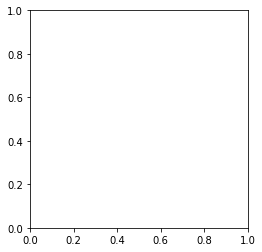

In [8]:
plt.imshow(qgo.any_metric_manifolds.utils._transform_metric(metric)[0])

In [26]:
metric[0, 0, 0, :, 1, 1, :]

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[ 8.54668615,  6.13453742],
       [-2.4482089 , -0.97421928]])>

In [27]:
qgo.any_metric_manifolds.utils._transform_metric(metric)[0, 0, 0, :, 1, 1, :]

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[-0.97421928,  2.4482089 ],
       [-6.13453742,  8.54668615]])>

In [8]:
metric

<tf.Tensor: shape=(2, 3, 2, 2, 3, 2, 2), dtype=float64, numpy=
array([[[[[[[ 10.37310802,   4.08489919],
            [ -2.37281174,   1.69460795]],

           [[  4.31004356,   3.01134651],
            [  2.34102683,  -5.21602778]],

           [[  0.12663742,   0.08574887],
            [ -1.92121611,  -4.22665773]]],


          [[[  4.08489919,   8.26350656],
            [  1.10816205,   1.40999296]],

           [[ -1.67825168,  -1.03646057],
            [  5.67757504,  -1.37505741]],

           [[  4.43423252,   3.03972085],
            [ -1.42434242,  -4.1924162 ]]]],



         [[[[ -2.37281174,   1.10816205],
            [ 14.78881984,   1.28890457]],

           [[-10.41720631,   0.17287885],
            [  2.82510312,   1.83406901]],

           [[  0.50114894,   0.28095544],
            [ -0.99846702,   4.5506362 ]]],


          [[[  1.69460795,   1.40999296],
            [  1.28890457,  13.240699  ]],

           [[  1.03298192,  -6.31851876],
            [ -0.93980201, 